# Analyse de contenu textuel

Traitement du texte -> TAL

### Chargement du corpus

In [1]:
import pandas as pd
corpus = pd.read_csv("../data/europresse_science_ouverte_presse_nationale.csv")
corpus.head()

,Date_reco,Date,Titre,Journal,Contenu,Auteur
0,2021-07-15,"Science & Médecine, jeudi 15 juillet 2021 72...",Des résultats scientifiques plus accessibles ...,Le Monde,Les budgets qui augmentent dans le monde de ...,David Larousserie
1,2021-12-11,"Régions, samedi 11 décembre 2021 597 mots","In&Sight, la plateforme bordelaise résolue à ...","La Tribune (France), no. 7287",LA TRIBUNE - Vous avez co-fondé In&Sight (1)...,Propos recueillis par Anne Farthouat
2,2020-06-16,"mardi 16 juin 2020 1026 mots, p. 8,9",Coronavirus : les grandes revues scientifique...,Libération,"Al'image du Lancet, les revues scientifiques...",Olivier Monod
3,2020-01-10,"Horizons, vendredi 10 janvier 2020 1873 mots...","Paul Allen, bienfaiteur de Seattle La philant...",Le Monde,Seattle (États-Unis) envoyé spécial - Le cél...,Arnaud Leparmentier
4,2017-09-20,"Science & Médecine, mercredi 20 septembre 20...",La recherche académique a tout à gagner à se ...,Le Monde,"Progressivement, le concept d'Open Science t...",NaN


## Utiliser des traitements statistiques

Texte -> vecteur -> traitements statistiques

Le mot (ou le lemme) comme unité de base, puis des méthodes génériques

(par ex ici : https://towardsdatascience.com/clustering-documents-with-python-97314ad6a78d)

In [2]:
# Utilisation de sklearn (mais possible d'utiliser d'autres bibliothèques)
from sklearn.feature_extraction.text import TfidfVectorizer

# Création d'un objet de vectorisation
vectorizer = TfidfVectorizer(stop_words={'french'})

# Application
X = vectorizer.fit_transform(corpus["Contenu"])

In [3]:
vectorizer.get_feature_names()[10000:10010]

['monture',
 'monté',
 'montée',
 'montés',
 'monumentale',
 'monétaire',
 'monétaires',
 'monétaristes',
 'monétise',
 'monétisent']

In [4]:
X[1,:].todense()

matrix([[0.02261373, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

Une fois la matrice obtenue, il est possible d'appliquer une méthode numérique de clusters

(ici la méthode des K-means : trouver les N groupes qui minimisent la distance suivant certaines règles

On teste plusieurs N pour trouver celui qui marche le mieux ...

Text(0, 0.5, 'Sum_of_squared_distances')

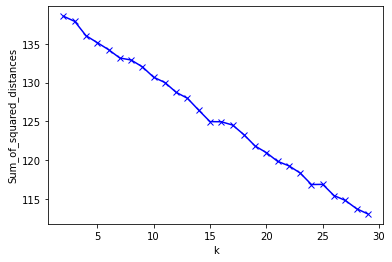

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


Sum_of_squared_distances = []
K = range(2,30)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')

Application d'un clustering

In [13]:
true_k = 10
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
corpus["labels"] = model.labels_

In [17]:
corpus[corpus["labels"]==2]

,Unnamed: 0,Date_reco,Date,Titre,Journal,Contenu,Auteur,Journaux-reco,Freq_chloro,labels
89,89,NaN,"Bench Marks!, Tuesday, September 22, 2020 14...",Chemical Concentrations in Cell Culture Compa...,ALTEX: Alternatives to Animal Experimentation...,10.14573/altex.2008251 In biological systems...,"Kisitu, Jaffar - Hollert, Henner - Fisher, Cia...",Autre,2,2
126,126,NaN,"Monday, June 1, 2020 7558 mots, p. 3(18)","""You Must Adhere Strictly to the Time and Day...","Linguistik Online, no. Vol. 102, no 2",10.13092/lo.102.6812 Using the methodology o...,"Boluwaduro, Eniola",Autre,2,2
217,217,NaN,"Tuesday, January 1, 2019 14364 mots, p. 39(26)",Investigating Cell Type Specific Mechanisms C...,ALTEX: Alternatives to Animal Experimentation...,10.14573/altex.1805181 The replacement of an...,NaN,Autre,2,2
235,235,NaN,"Wednesday, December 5, 2018 1280 mots, p. NA",Venezuela gold rush feeds a growing malaria e...,IRIN Africa,"Handsome and with neatly slicked hair, Victo...",NaN,Autre,1,2


## Utiliser une bibliothèque de TAL

SpaCy est assez mature

Si ça vous intéresse : https://www.youtube.com/c/PythonTutorialsforDigitalHumanities/playlists?view=50&sort=dd&shelf_id=4
 

![blob](https://spacy.io/pipeline-fde48da9b43661abcdf62ab70a546d71.svg)

In [23]:
import spacy

# https://spacy.io/models/fr -> installer le modèle
#!python -m spacy download fr_core_news_md #sm

nlp = spacy.load("fr_core_news_md")

In [25]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x146815000>),
 ('morphologizer',
  <spacy.pipeline.morphologizer.Morphologizer at 0x1468159c0>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x14633d700>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x1460e8d00>),
 ('lemmatizer', <spacy.lang.fr.lemmatizer.FrenchLemmatizer at 0x1460eb7c0>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x14633d8c0>)]

Test sur une phrase

In [32]:
phrase_enveloppee = nlp("Tester ceci sur une phrase. Est-ce que cela va marcher ?")

In [30]:
for i in phrase_enveloppee:
    print(i,i.pos_)

Tester VERB
ceci PRON
sur ADP
une DET
phrase NOUN
. PUNCT
Est NOUN
-ce PRON
que SCONJ
cela PRON
va VERB
marcher VERB
? PUNCT


In [33]:
phrase_enveloppee.ents

()

Application sur le corpus

In [34]:
corpus["Spacy"] = corpus["Contenu"].apply(nlp)

Détection d'entités

In [39]:
corpus["Spacy"].iloc[3].ents

(MONDE,
 Nivaquine,
 Chine,
 Plaquenil,
 SARS-CoV-2,
 France,
 Didier Raoult,
 Institut hospitalo-universitaire,
 Méditerranée,
 Marseille,
 ministre de la Santé,
 Plaquenil,
 Allemagne,
 SARS,
 Chine,
 Cell Research,
 Chine,
 BioScience,
 Zhong Nanshan,
 SARS,
 Chinois,
 Didier Raoult,
 CPP,
 Agence nationale de sécurité du médicament et des produits de santé,
 ANSM,
 Raoult,
 Pour ce spécialiste des maladies infectieuses,
 Covid-19,
 Chine,
 Iran,
 Corée du Sud,
 Arabie saoudite,
 France,
 CRPV,
 Covid-19,
 Covid-19,
 Sanofi,
 Dépakine,
 Nivaquine,
 Le Monde,
 Chine,
 Iran,
 Corée du Sud,
 Arabie saoudite,
 DIRECTEUR DE,
 MARSEILLE)

Ne garder que les noms mentionnés dans l'article

In [40]:
def filter_words(x):
    r = []
    for token in x:
        if token.pos_ == "NOUN":
            r.append(token.lemma_)
    return r

In [41]:
corpus["BOW"] = corpus["Spacy"].apply(filter_words)

In [42]:
corpus["BOW"].iloc[10]

['chercheur',
 'mort',
 'étude',
 'chloroquine',
 'polémique',
 'cible',
 'uneviolente',
 'scientifique',
 'romand',
 'tribunedan',
 'plainte',
 'science',
 'controverse',
 'dispute',
 'violence',
 'étude',
 'inutilité',
 'dangerosité',
 'chloroquine',
 'coronavirus',
 'chercheur',
 'université',
 'objet',
 'campagne',
 'raillerie',
 'intimidation',
 'insulte',
 'homophobe',
 'menace',
 'mort',
 'cabale',
 'prochloroquine',
 'publication',
 'étude',
 'revue',
 'infection',
 'fin',
 'août',
 'centaine',
 'message',
 'insulte',
 'menace',
 'coup',
 'téléphone',
 'parent',
 'biochimie',
 'collègue',
 'droit',
 'salve',
 'acabit',
 'appel',
 'assassin',
 'humanité',
 'pharma',
 'rue',
 'vidéo',
 'soutien',
 'confrère',
 'période',
 'peur',
 'téléphone',
 'saisie',
 'traitement',
 'mois',
 'débat',
 'médicament',
 'voisin',
 'impulsion',
 'professeur',
 'chantre',
 'molécule',
 'ordre',
 'médecin',
 'partisan',
 'opposant',
 'traitement',
 'mois',
 'chercheur',
 'assaillant',
 'majorité',
 

Et ensuite ... construire des modèles :)

In [57]:
a = corpus["Spacy"].loc[10]

In [59]:
corpus["Spacy"].apply(lambda x : x.similarity(a))

0      0.976567
1      0.978755
2      0.918640
3      0.936945
4      0.953656
         ...   
232    0.961570
233    0.964838
234    0.965946
235   -0.064989
236    0.962488
Name: Spacy, Length: 237, dtype: float64